In [1]:
import pandas as pd
import numpy as np
import missingno as msno


## Import the datasets

In [2]:
# import the Barcelona rent dataset
rent_prices_df = pd.read_csv('./data/cleaned/rent/rent_prices.csv')
print(rent_prices_df.shape)
rent_prices_df.head()

(2044, 9)


,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€)
0,2017,1,2017-01-01,1,Ciutat Vella,1,el Raval,734.99,13.50
1,2017,1,2017-01-01,1,Ciutat Vella,2,el Barri Gòtic,905.26,14.14
2,2017,1,2017-01-01,1,Ciutat Vella,3,la Barceloneta,722.78,19.46
3,2017,1,2017-01-01,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",895.28,15.01
4,2017,1,2017-01-01,2,Eixample,5,el Fort Pienc,871.08,12.77


In [3]:
# import the Barcelona unemployment rate dataset
unemployment_df = pd.read_csv('./data/cleaned/unemployment/unemployment.csv')
print(unemployment_df.shape)
unemployment_df.head()

(444, 8)


,year,district_code,district_name,neighbourhood_code,neighbourhood_name,From 6 months to 12 motnhs,Over 12 months,Up to 6 months
0,2015,1,Ciutat Vella,1,el Raval,7562,18642,22445
1,2015,1,Ciutat Vella,2,el Barri Gòtic,1986,5139,5855
2,2015,1,Ciutat Vella,3,la Barceloneta,2128,6088,6212
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2949,8425,8625
4,2015,2,Eixample,5,el Fort Pienc,2848,8666,7607


In [4]:
# import the Barcelona demographics dataset
demographics_df = pd.read_csv('./data/cleaned/demographics/demographics.csv')
print(demographics_df.shape)
demographics_df.head()

(439, 15)


,year,district_code,district_name,neighbourhood_code,neighbourhood_name,1 Spanish,1 foreigner,2 Spanish,2 foreigners,3 Spanish,3 foreigners,4 espanyols o més,more than 4 foreigners,no Spanish,no foreigner
0,2015,1,Ciutat Vella,1,el Raval,6104.0,3066.0,3294.0,1608.0,1588.0,1058.0,1451.0,2229.0,NaN,NaN
1,2015,1,Ciutat Vella,2,el Barri Gòtic,2373.0,1415.0,1273.0,723.0,570.0,343.0,478.0,435.0,NaN,NaN
2,2015,1,Ciutat Vella,3,la Barceloneta,2496.0,1236.0,1491.0,638.0,734.0,277.0,585.0,257.0,NaN,NaN
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",3812.0,2108.0,1964.0,1029.0,916.0,478.0,692.0,534.0,NaN,NaN
4,2015,2,Eixample,5,el Fort Pienc,4216.0,1415.0,3426.0,594.0,2189.0,362.0,1765.0,441.0,NaN,NaN


In [5]:
# import the Barcelona education level dataset
education_df = pd.read_csv('./data/cleaned/education/academic_level.csv')
print(education_df.shape)
education_df.head()

(439, 17)


,year,district_code,district_name,neighbourhood_code,neighbourhood_name,man_bachelors_degree,man_elementary_school,man_junior_high_school,man_senior_high_school,man_unknown,man_without education,woman_bachelors_degree,woman_elementary_school,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education
0,2015,1,Ciutat Vella,1,el Raval,4455,9031,4966,3909,5,443,4563,5932,3732,3300,7,880
1,2015,1,Ciutat Vella,2,el Barri Gòtic,2534,1567,1323,1713,0,124,2721,1170,977,1515,1,268
2,2015,1,Ciutat Vella,3,la Barceloneta,1560,1782,1726,1438,2,244,1839,1786,1444,1259,1,553
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",3480,2225,1807,2263,2,190,4002,2020,1464,2067,5,470
4,2015,2,Eixample,5,el Fort Pienc,4637,1767,2341,3808,2,290,5462,2490,2690,3655,3,571


In [6]:
airbnb_df = pd.read_csv('./data/cleaned/airbnb/airbnb_simple.csv')
print(airbnb_df.shape)
airbnb_df.head()

(1572, 8)


,neighbourhood,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,Baró de Viver,2015-07-01,75.00,1,358.00,1.00,0.0,0.0
1,Baró de Viver,2016-01-01,27.00,1,365.00,0.00,0.0,0.0
2,Baró de Viver,2017-01-01,90.00,1,2.00,1.00,0.0,0.0
3,Baró de Viver,2017-04-01,94.75,4,128.25,0.25,0.0,0.0
4,Baró de Viver,2017-07-01,90.00,1,4.00,1.00,0.0,0.0


## Start merging

### Merge rent prices and unemployment datasets

In [7]:
# merge rent_prices and unemployment datasets
merged = rent_prices_df.merge(unemployment_df.drop(columns=['district_code', 'district_name', 'neighbourhood_name']), 
                     on=['year','neighbourhood_code'], how='outer')
print(merged.shape)
merged.head()

(2050, 12)


,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,Up to 6 months
0,2017,1.0,2017-01-01,1.0,Ciutat Vella,1,el Raval,734.99,13.50,6054.0,14379.0,20385.0
1,2017,2.0,2017-04-01,1.0,Ciutat Vella,1,el Raval,714.29,13.69,6054.0,14379.0,20385.0
2,2017,3.0,2017-07-01,1.0,Ciutat Vella,1,el Raval,764.85,13.97,6054.0,14379.0,20385.0
3,2017,4.0,2017-10-01,1.0,Ciutat Vella,1,el Raval,776.73,14.42,6054.0,14379.0,20385.0
4,2017,1.0,2017-01-01,1.0,Ciutat Vella,2,el Barri Gòtic,905.26,14.14,1568.0,3322.0,5632.0


<AxesSubplot:>

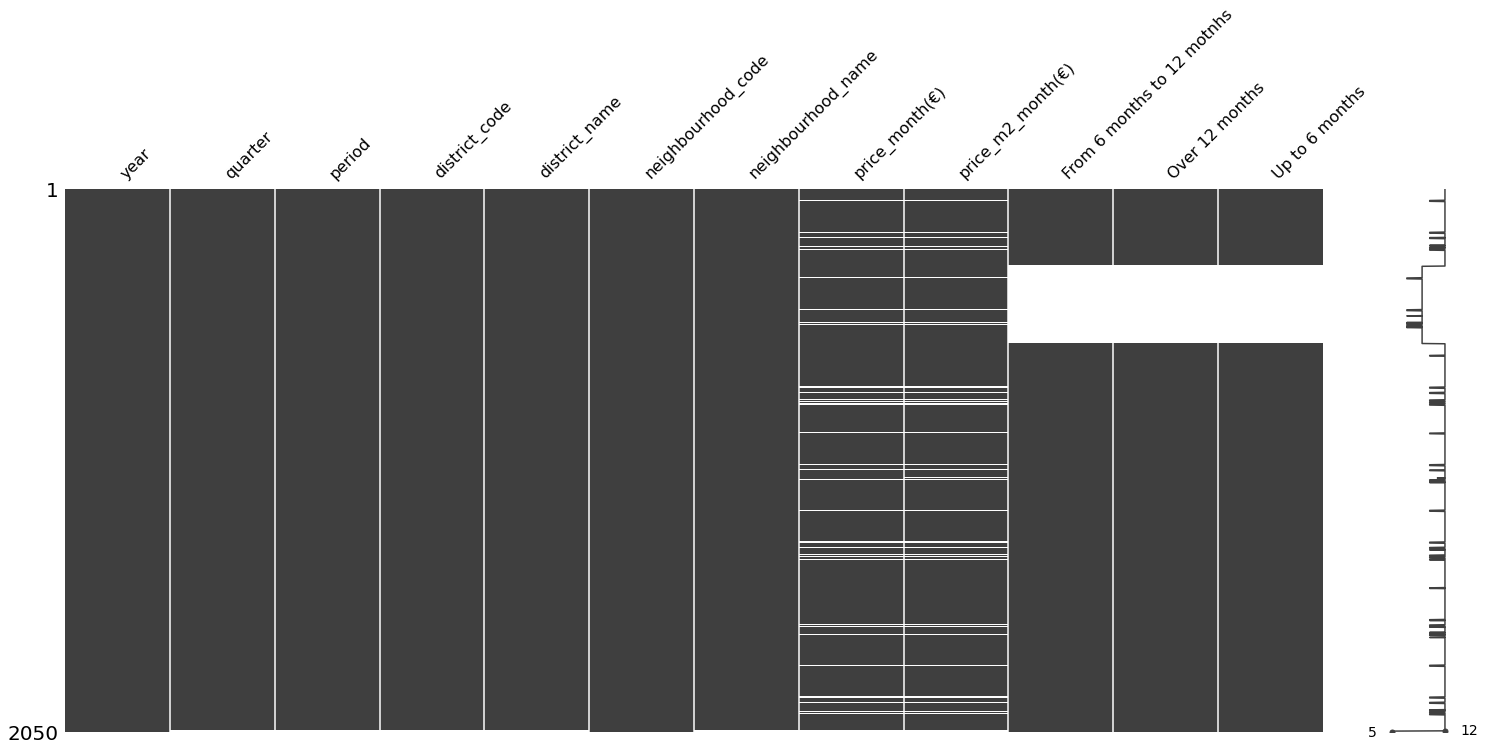

In [8]:
# check how the merge behaved
msno.matrix(merged)

In [9]:
merged[merged['Up to 6 months'].isna()]

,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,Up to 6 months
292,2014,1.0,2014-01-01,1.0,Ciutat Vella,1,el Raval,589.55,10.76,NaN,NaN,NaN
293,2014,2.0,2014-04-01,1.0,Ciutat Vella,1,el Raval,550.63,10.52,NaN,NaN,NaN
294,2014,3.0,2014-07-01,1.0,Ciutat Vella,1,el Raval,576.45,9.84,NaN,NaN,NaN
295,2014,4.0,2014-10-01,1.0,Ciutat Vella,1,el Raval,597.00,10.81,NaN,NaN,NaN
296,2014,1.0,2014-01-01,1.0,Ciutat Vella,2,el Barri Gòtic,712.79,10.58,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
579,2014,4.0,2014-10-01,10.0,Sant Martí,72,Sant Martí de Provençals,636.30,8.86,NaN,NaN,NaN
580,2014,1.0,2014-01-01,10.0,Sant Martí,73,la Verneda i la Pau,568.68,8.34,NaN,NaN,NaN
581,2014,2.0,2014-04-01,10.0,Sant Martí,73,la Verneda i la Pau,569.14,8.26,NaN,NaN,NaN
582,2014,3.0,2014-07-01,10.0,Sant Martí,73,la Verneda i la Pau,569.84,8.52,NaN,NaN,NaN


**All these NaNs** are because there is no unemployment data **for 2014**:

In [10]:
unemployment_df[unemployment_df['year'] == 2014]

,year,district_code,district_name,neighbourhood_code,neighbourhood_name,From 6 months to 12 motnhs,Over 12 months,Up to 6 months


There is also a little gap at the end of the graph, with a neighbourhood_code of 99!!

In [11]:
merged[merged['neighbourhood_name'].isna()]

,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,Up to 6 months
2044,2015,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,9.0,20.0,7.0
2045,2016,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,8.0,15.0,100.0
2046,2017,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,8.0,17.0,63.0
2047,2018,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,9.0,24.0,82.0
2048,2019,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,41.0,50.0,104.0
2049,2020,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,428.0,141.0,1577.0


### Merge now the demographics dataset

In [12]:
# merge now the demographics dataset
merged = merged.merge(demographics_df.drop(columns=['district_code', 'district_name', 'neighbourhood_name']), 
                     on=['year','neighbourhood_code'], how='outer')
print(merged.shape)
merged.head()

(2050, 22)


,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,...,1 Spanish,1 foreigner,2 Spanish,2 foreigners,3 Spanish,3 foreigners,4 espanyols o més,more than 4 foreigners,no Spanish,no foreigner
0,2017,1.0,2017-01-01,1.0,Ciutat Vella,1,el Raval,734.99,13.50,6054.0,...,6030.0,3353.0,3135.0,1770.0,1563.0,1152.0,1423.0,2286.0,NaN,NaN
1,2017,2.0,2017-04-01,1.0,Ciutat Vella,1,el Raval,714.29,13.69,6054.0,...,6030.0,3353.0,3135.0,1770.0,1563.0,1152.0,1423.0,2286.0,NaN,NaN
2,2017,3.0,2017-07-01,1.0,Ciutat Vella,1,el Raval,764.85,13.97,6054.0,...,6030.0,3353.0,3135.0,1770.0,1563.0,1152.0,1423.0,2286.0,NaN,NaN
3,2017,4.0,2017-10-01,1.0,Ciutat Vella,1,el Raval,776.73,14.42,6054.0,...,6030.0,3353.0,3135.0,1770.0,1563.0,1152.0,1423.0,2286.0,NaN,NaN
4,2017,1.0,2017-01-01,1.0,Ciutat Vella,2,el Barri Gòtic,905.26,14.14,1568.0,...,2371.0,1485.0,1166.0,823.0,541.0,381.0,433.0,495.0,NaN,NaN


<AxesSubplot:>

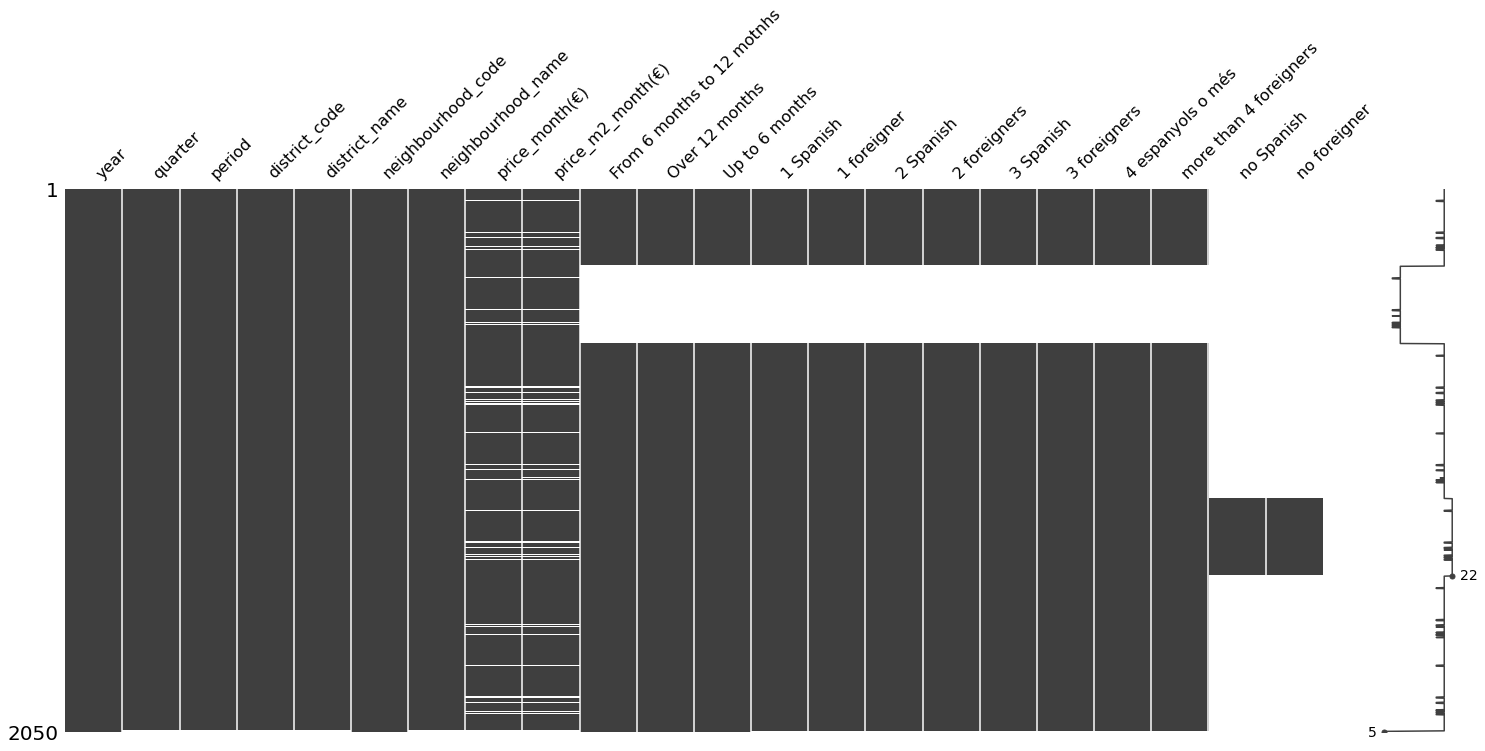

In [13]:
# check how the merge behaved
msno.matrix(merged)

Again, there is no demographics data for 2014:

In [14]:
demographics_df[demographics_df['year'] == 2014]

,year,district_code,district_name,neighbourhood_code,neighbourhood_name,1 Spanish,1 foreigner,2 Spanish,2 foreigners,3 Spanish,3 foreigners,4 espanyols o més,more than 4 foreigners,no Spanish,no foreigner


And the neighbourhood code 99, too, but in this case is empty

In [15]:
demographics_df[demographics_df['neighbourhood_code'] == 99]

,year,district_code,district_name,neighbourhood_code,neighbourhood_name,1 Spanish,1 foreigner,2 Spanish,2 foreigners,3 Spanish,3 foreigners,4 espanyols o més,more than 4 foreigners,no Spanish,no foreigner
73,2015,99,No consta,99,No consta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Also, the *no Spanish*, *no Foreigner* columns are almost empty:

In [16]:
merged[['no Spanish', 'no foreigner']].isna().sum()

no Spanish      1758
no foreigner    1758
dtype: int64

### Merge now the academic level dataset

In [17]:
# merge now the academic_level dataset
merged = merged.merge(education_df.drop(columns=['district_code', 'district_name', 'neighbourhood_name']), 
                     on=['year','neighbourhood_code'], how='outer')
print(merged.shape)
merged.head()

(2050, 34)


,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,...,man_junior_high_school,man_senior_high_school,man_unknown,man_without education,woman_bachelors_degree,woman_elementary_school,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education
0,2017,1.0,2017-01-01,1.0,Ciutat Vella,1,el Raval,734.99,13.50,6054.0,...,5529.0,4062.0,359.0,264.0,5082.0,5280.0,4143.0,3439.0,271.0,638.0
1,2017,2.0,2017-04-01,1.0,Ciutat Vella,1,el Raval,714.29,13.69,6054.0,...,5529.0,4062.0,359.0,264.0,5082.0,5280.0,4143.0,3439.0,271.0,638.0
2,2017,3.0,2017-07-01,1.0,Ciutat Vella,1,el Raval,764.85,13.97,6054.0,...,5529.0,4062.0,359.0,264.0,5082.0,5280.0,4143.0,3439.0,271.0,638.0
3,2017,4.0,2017-10-01,1.0,Ciutat Vella,1,el Raval,776.73,14.42,6054.0,...,5529.0,4062.0,359.0,264.0,5082.0,5280.0,4143.0,3439.0,271.0,638.0
4,2017,1.0,2017-01-01,1.0,Ciutat Vella,2,el Barri Gòtic,905.26,14.14,1568.0,...,1575.0,1802.0,68.0,87.0,3017.0,1084.0,1112.0,1619.0,56.0,205.0


<AxesSubplot:>

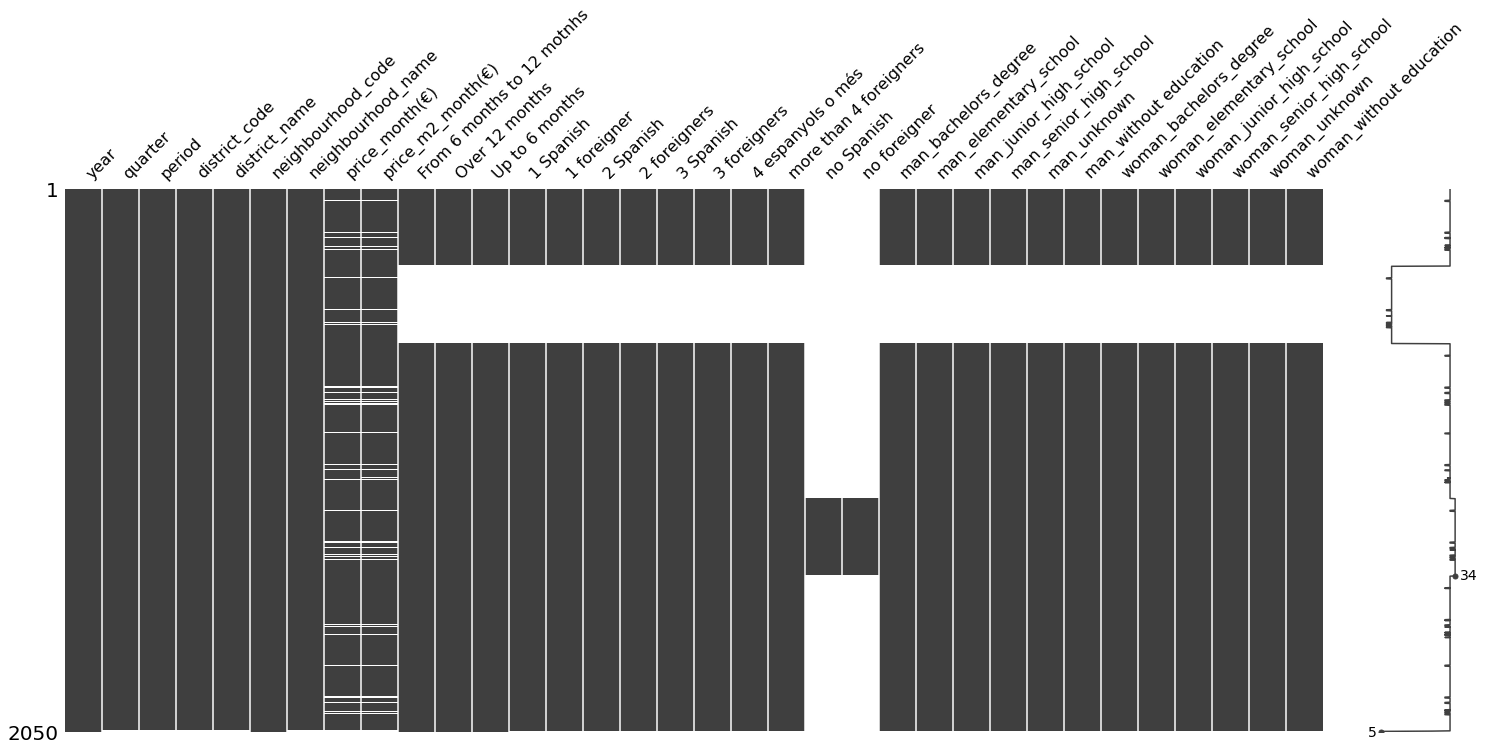

In [18]:
# check how the merge behaved
msno.matrix(merged)

Again, we don't have education data for 2014:

In [19]:
education_df[education_df['year'] == 2014]

,year,district_code,district_name,neighbourhood_code,neighbourhood_name,man_bachelors_degree,man_elementary_school,man_junior_high_school,man_senior_high_school,man_unknown,man_without education,woman_bachelors_degree,woman_elementary_school,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education


And the neighbourhood_code 99, empty again

In [20]:
education_df[education_df['neighbourhood_code'] == 99]

,year,district_code,district_name,neighbourhood_code,neighbourhood_name,man_bachelors_degree,man_elementary_school,man_junior_high_school,man_senior_high_school,man_unknown,man_without education,woman_bachelors_degree,woman_elementary_school,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education
73,2015,99,No consta,99,No consta,0,0,0,0,0,0,0,0,0,1,0,0


### Merge the airbnb dataset

In [21]:
# merge the airbnb dataset
airbnb_df = airbnb_df.rename(columns={'neighbourhood':'neighbourhood_name'})
merged = merged.merge(airbnb_df, on=['period', 'neighbourhood_name'], how='outer')
print(merged.shape)
merged.head()

(2122, 40)


,year,quarter,period,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,2017.0,1.0,2017-01-01,1.0,Ciutat Vella,1.0,el Raval,734.99,13.50,6054.0,...,4143.0,3439.0,271.0,638.0,69.122576,1444.0,208.791551,0.461219,0.076870,0.001385
1,2017.0,2.0,2017-04-01,1.0,Ciutat Vella,1.0,el Raval,714.29,13.69,6054.0,...,4143.0,3439.0,271.0,638.0,75.554371,1407.0,172.835110,0.439943,0.073916,0.003554
2,2017.0,3.0,2017-07-01,1.0,Ciutat Vella,1.0,el Raval,764.85,13.97,6054.0,...,4143.0,3439.0,271.0,638.0,80.244898,1372.0,162.528426,0.416181,0.049563,0.002915
3,2017.0,4.0,2017-10-01,1.0,Ciutat Vella,1.0,el Raval,776.73,14.42,6054.0,...,4143.0,3439.0,271.0,638.0,82.460993,1410.0,170.300000,0.404965,0.058156,0.010638
4,2017.0,1.0,2017-01-01,1.0,Ciutat Vella,2.0,el Barri Gòtic,905.26,14.14,1568.0,...,1112.0,1619.0,56.0,205.0,82.141653,1186.0,210.263912,0.429174,0.076728,0.009275


In [22]:
merged = merged.drop(columns='quarter').rename(columns={'period':'quarter'})
merged.head()

,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,2017.0,2017-01-01,1.0,Ciutat Vella,1.0,el Raval,734.99,13.50,6054.0,14379.0,...,4143.0,3439.0,271.0,638.0,69.122576,1444.0,208.791551,0.461219,0.076870,0.001385
1,2017.0,2017-04-01,1.0,Ciutat Vella,1.0,el Raval,714.29,13.69,6054.0,14379.0,...,4143.0,3439.0,271.0,638.0,75.554371,1407.0,172.835110,0.439943,0.073916,0.003554
2,2017.0,2017-07-01,1.0,Ciutat Vella,1.0,el Raval,764.85,13.97,6054.0,14379.0,...,4143.0,3439.0,271.0,638.0,80.244898,1372.0,162.528426,0.416181,0.049563,0.002915
3,2017.0,2017-10-01,1.0,Ciutat Vella,1.0,el Raval,776.73,14.42,6054.0,14379.0,...,4143.0,3439.0,271.0,638.0,82.460993,1410.0,170.300000,0.404965,0.058156,0.010638
4,2017.0,2017-01-01,1.0,Ciutat Vella,2.0,el Barri Gòtic,905.26,14.14,1568.0,3322.0,...,1112.0,1619.0,56.0,205.0,82.141653,1186.0,210.263912,0.429174,0.076728,0.009275


<AxesSubplot:>

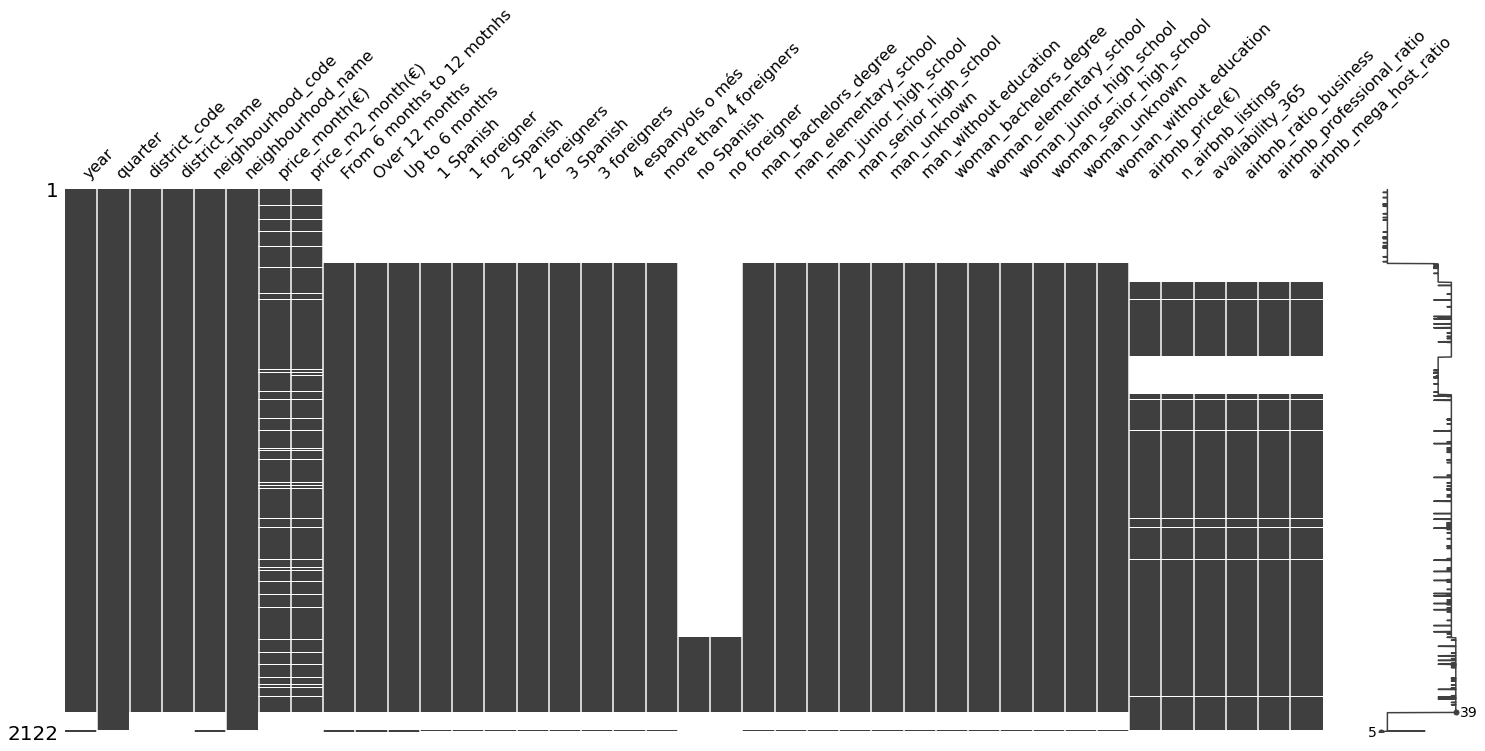

In [23]:
# see how the merge went
msno.matrix(merged.sort_values('quarter'))

There is no data from the other datasets for 2021, that explains the gap in the bottom:

In [24]:
merged[merged['quarter'] == '2021-01-01'].isna().sum()

year                          72
quarter                        0
district_code                 72
district_name                 72
neighbourhood_code            72
neighbourhood_name             0
price_month(€)                72
price_m2_month(€)             72
From 6 months to 12 motnhs    72
Over 12 months                72
Up to 6 months                72
1 Spanish                     72
1 foreigner                   72
2 Spanish                     72
2 foreigners                  72
3 Spanish                     72
3 foreigners                  72
4 espanyols o més             72
more than 4 foreigners        72
no Spanish                    72
no foreigner                  72
man_bachelors_degree          72
man_elementary_school         72
man_junior_high_school        72
man_senior_high_school        72
man_unknown                   72
man_without education         72
woman_bachelors_degree        72
woman_elementary_school       72
woman_junior_high_school      72
woman_seni

There is no airbnb data for certain neighbourhoods and certain quarters, like this (these airbnb values, we can input to zero):

In [25]:
merged[(merged['quarter'] == '2019-01-01') & (merged['airbnb_price(€)'].isna())]

,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
748,2019.0,2019-01-01,7.0,Horta-Guinardó,42.0,la Clota,NaN,NaN,31.0,72.0,...,69.0,57.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
768,2019.0,2019-01-01,8.0,Nou Barris,47.0,Can Peguera,NaN,NaN,191.0,481.0,...,308.0,179.0,26.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN


And for certain periods, like these:

In [26]:
airbnb_df[airbnb_df['period'] == '2016-04-01']

,neighbourhood_name,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio


In [27]:
airbnb_df[airbnb_df['period'] == '2016-07-01']

,neighbourhood_name,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio


### Summary: 

+ We should drop rows with year 2014
+ We should also drop rows with quarter greater than '2020-10-01' (the last date with information from rents)
+ We should drop *no Spanish* and *no foreigner* columns
+ We should drop the neighbourhood_code 99, because it's not useful for what we want (predict rent prices for neighbourhood)
+ We should input to zero the airbnb data that we have no information of (certain neighbourhoods for certain periods)

Question:
+ What we do with the airbnb data missed for entire periods?

## Dropping of columns and rows

In [28]:
merged = merged.drop(merged[merged['year'] == 2014].index, axis=0)

In [29]:
merged = merged.drop(merged[merged['quarter'] > '2020-10-01'].index, axis=0)

In [30]:
merged = merged.drop(['no Spanish', 'no foreigner'], axis=1)

In [31]:
merged = merged.drop(merged[merged['neighbourhood_code'] == 99].index, axis=0)

## Imputing aibnb data

In [32]:
valid_airbnb_quarters = airbnb_df['period'].unique()
valid_airbnb_quarters

array(['2015-07-01', '2016-01-01', '2017-01-01', '2017-04-01',
       '2017-07-01', '2017-10-01', '2018-01-01', '2018-04-01',
       '2018-07-01', '2018-10-01', '2019-01-01', '2019-04-01',
       '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
       '2020-07-01', '2020-10-01', '2021-01-01', '2015-04-01',
       '2015-10-01', '2016-10-01'], dtype=object)

In [33]:
airbnb_columns_to_fill = airbnb_df.columns.drop(['neighbourhood_name', 'period'])
airbnb_columns_to_fill

Index(['airbnb_price(€)', 'n_airbnb_listings', 'availability_365',
       'airbnb_ratio_business', 'airbnb_professional_ratio',
       'airbnb_mega_host_ratio'],
      dtype='object')

In [34]:
merged.loc[(merged['quarter'].isin(valid_airbnb_quarters) & (merged['airbnb_price(€)'].isna())), airbnb_columns_to_fill] = 0

<AxesSubplot:>

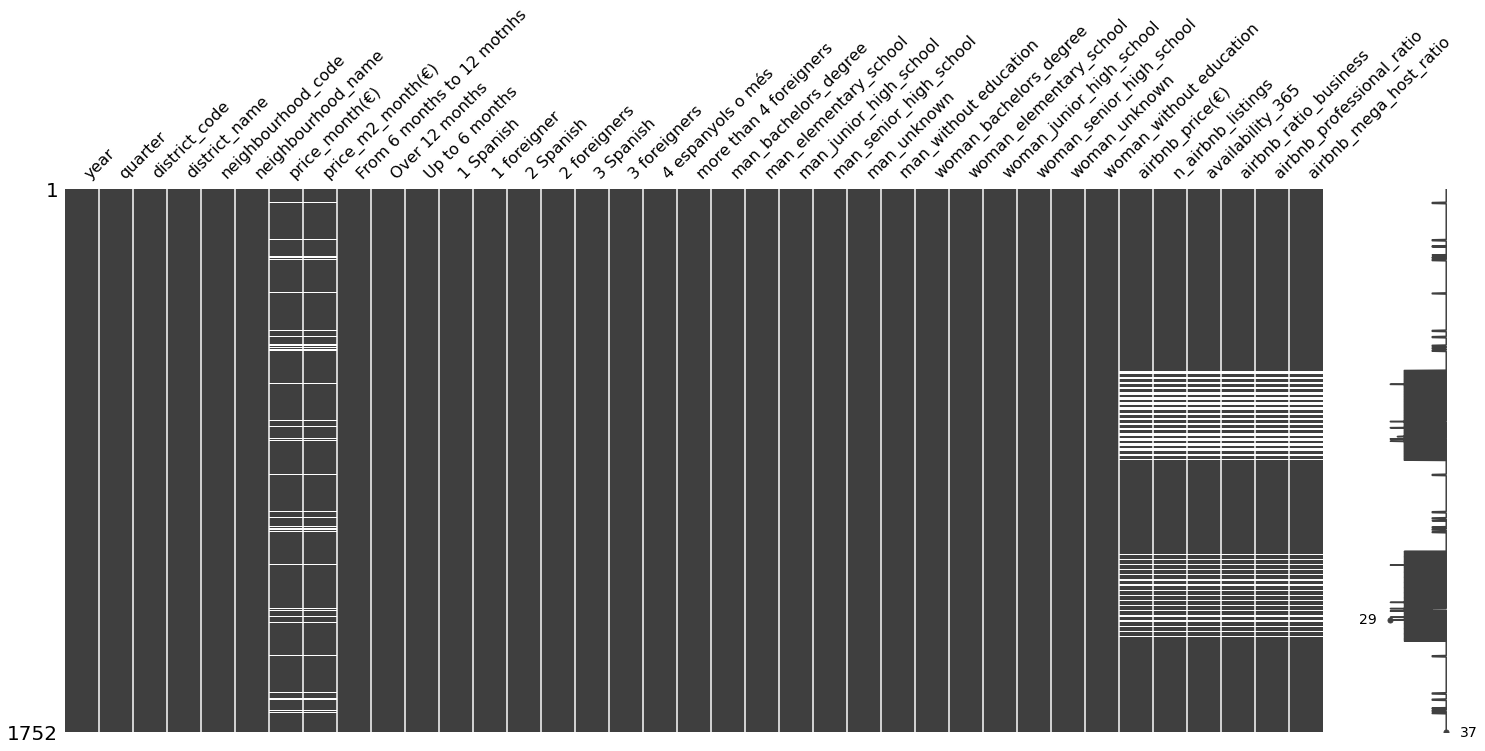

In [35]:
msno.matrix(merged)

## Reorder the dataframe: one neighbourhood after the other, and then the dates ordered for each neighbourhood

In [36]:
merged = merged.groupby(by=['district_name','neighbourhood_name']).apply(lambda df: df.sort_values('quarter'))
merged

year  \
district_name       neighbourhood_name                                   
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera 1472  2015.0   
                                                          1473  2015.0   
                                                          1474  2015.0   
                                                          1475  2015.0   
                                                          888   2016.0   
...                                                                ...   
Sarrià-Sant Gervasi les Tres Torres                       679   2019.0   
                                                          1260  2020.0   
                                                          1261  2020.0   
                                                          1262  2020.0   
                                                          1263  2020.0   

                                                                   quarter  \
district_name       neighbourhood_name                                       
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera 1472  2015-01-01   
                                                          1473  2015-04-01   
                                                          1474  2015-07-01   
                                                          1475  2015-10-01   
                                                          888   2016-01-01   
...                                                                    ...   
Sarrià-Sant Gervasi les Tres Torres                       679   2019-10-01   
                                                          1260  2020-01-01   
                                                          1261  2020-04-01   
                                                          1262  2020-07-01   
                                                          1263  2020-10-01   

                                                                district_code  \
district_name       neighbourhood_name                                          
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera 1472            1.0   
                                                          1473            1.0   
                                                          1474            1.0   
                                                          1475            1.0   
                                                          888             1.0   
...                                                                       ...   
Sarrià-Sant Gervasi les Tres Torres                       679             5.0   
                                                          1260            5.0   
                                                          1261            5.0   
                                                          1262            5.0   
                                                          1263            5.0   

                                                                      district_name  \
district_name       neighbourhood_name                                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera 1472         Ciutat Vella   
                                                          1473         Ciutat Vella   
                                                          1474         Ciutat Vella   
                                                          1475         Ciutat Vella   
                                                          888          Ciutat Vella   
...                                                                             ...   
Sarrià-Sant Gervasi les Tres Torres                       679   Sarrià-Sant Gervasi   
                                                          1260  Sarrià-Sant Gervasi   
                                                          1261  Sarrià-Sant Gervasi   
                                                          1262  Sarrià-Sant G

In [37]:
#and reset index
merged = merged.reset_index(drop=True)
merged.head()

,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,2015.0,2015-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",697.16,11.51,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,2015-04-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",708.03,12.02,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,73.343300,903.0,262.921373,0.631229,0.128461,0.016611
2,2015.0,2015-07-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",729.00,14.00,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,75.124776,1114.0,259.641831,0.607720,0.106822,0.002693
3,2015.0,2015-10-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",751.60,13.43,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,72.410441,1111.0,271.629163,0.580558,0.067507,0.001800
4,2016.0,2016-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",759.16,12.94,2563.0,7550.0,...,1509.0,2196.0,121.0,376.0,72.739919,992.0,260.639113,0.561492,0.073589,0.000000


## Export the dataframe

In [40]:
# merged.to_csv('./data/rent_airbnb_all_features.csv', index=False)